In [1]:
!pip install fredapi > /dev/null

In [2]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('ggplot')

import fredapi

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("fred-api")

In [3]:
import logging
import sys
import warnings
from prophet import Prophet



logging.getLogger("fbprophet").setLevel(logging.ERROR)
logging.getLogger("cmdstanpy").setLevel(logging.WARNING)

logging.basicConfig(stream=sys.stdout, level=logging.ERROR)
warnings.simplefilter(action='ignore', category=FutureWarning)

## Creating a FRED Object

We initialize a FRED object using the `Fredapi` package to access a wide range of economic datasets from the Federal Reserve Economic Data (FRED) API. This object allows us to retrieve historical and real-time economic indicators, such as GDP, inflation rates, employment figures, and other key economic data for analysis and forecasting.

### Step : Install the `Fredapi` Package

First, ensure that the `Fredapi` package is installed. You can install it using pip:

```bash
pip install fredapi

In [4]:
fred = fredapi.Fred(api_key = secret_value_0)

# S&P 500 Analysis with FRED API

In this project, we analyze the S&P 500 index using data from the Federal Reserve Economic Data (FRED) API. The analysis involves retrieving, cleaning, and visualizing the S&P 500 data to understand historical trends and potential future movements.

<Axes: title={'center': 'S&P 500'}>

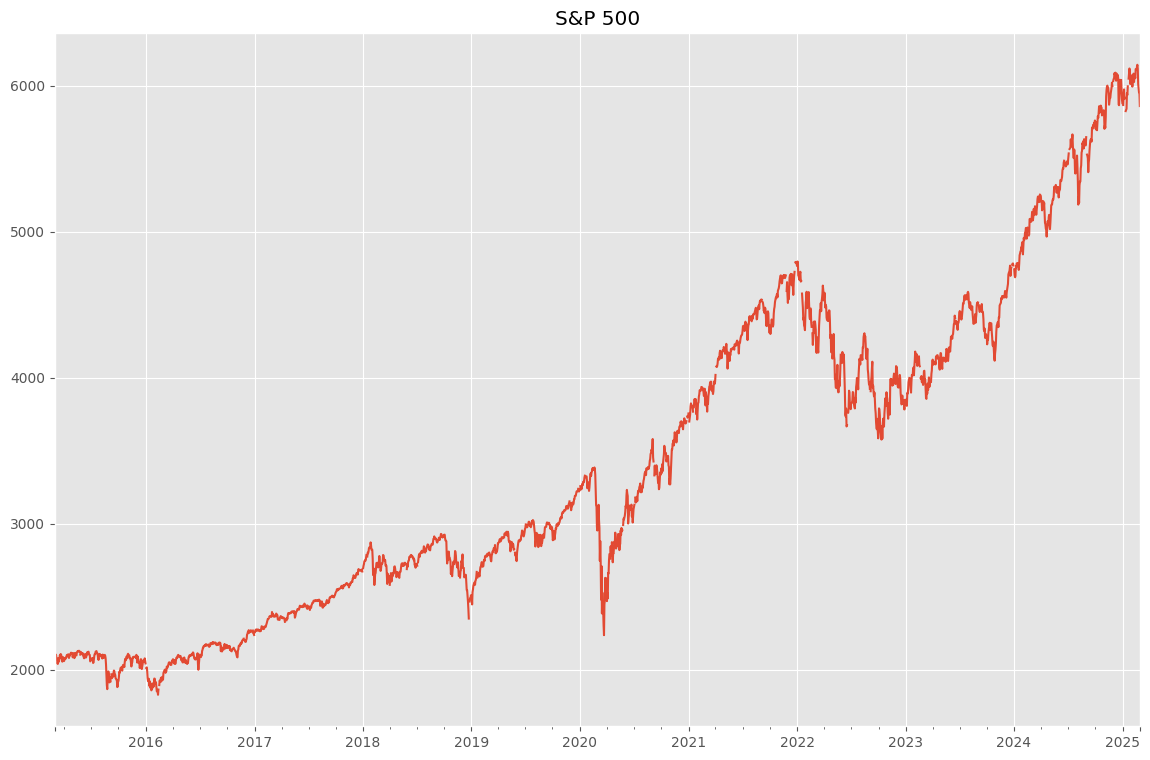

In [5]:
fred_Dset = fred.search('S&P', order_by = 'popularity')
sp500 = fred.get_series(series_id = "SP500")
sp500.plot(figsize=(14,9), title = "S&P 500" )

In [6]:
unemployemnt = fred.search("unemployment")

In [7]:
un_rate = fred.get_series("UNRATE")
unemployment_df=fred.search("unemployment rate state", filter=("frequency", "Monthly"))
unemployment_df=unemployment_df.query('units=="Percent" and seasonal_adjustment=="Seasonally Adjusted"')
# unemployment_df = unemployment_df.loc[unemployment_df["title"].str.contains("Unemployment Rate")]

## Fetching Consumer Price Index (CPI) Data

In [8]:
fred_CPI = fred.search("Inflation, consumer prices for the United States")
fred_CPI = fred_CPI.query('title=="Consumer Price Index for All Urban Consumers: Medical Care in U.S. City Average" and seasonal_adjustment=="Seasonally Adjusted"')
fred_CPI = fred.get_series("CPIMEDSL")
fred_CPI.name = "values"
fred_CPI.to_frame().reset_index()
fred_CPI = fred_CPI[fred_CPI.index > "1989-01-01"]

## Plotting 📈 the CPI from 1989-2023

In [9]:
fred_CPI.to_frame().reset_index()
CPI_plot = px.line(fred_CPI, x=fred_CPI.index, y="values", title="CPI AVG 1989-2024")
CPI_plot.show()

In [10]:
gg = fred_CPI.copy()
gg = pd.DataFrame(gg).reset_index()

In [11]:
gg = gg.rename(columns={"values": "y", "index": "ds"})
gg.tail()

,ds,y
427,2024-09-01,566.497
428,2024-10-01,567.835
429,2024-11-01,569.160
430,2024-12-01,569.902
431,2025-01-01,571.234


# Forecasting Future Trends with Prophet

In this section, we use the trained Prophet model to generate future predictions. The following steps outline the process of creating a future dataframe and using the model to forecast future trends.

## Step 1: Create a Future DataFrame

We begin by creating a future dataframe that extends beyond the existing data. In this case, we generate predictions for the next 10 months.

```python
import pandas as pd
from fbprophet import Prophet

# Assume model is already trained
# Define the forecast horizon (10 months)
future = model.make_future_dataframe(df, periods=10, freq='MS')

In [12]:
from prophet import Prophet

kkopp= Prophet()
kkopp.fit(gg)

05:16:46 - cmdstanpy - INFO - Chain [1] start processing
05:16:46 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = kkopp.make_future_dataframe(periods=10, freq="MS")

In [14]:
result  = kkopp.predict(future)
result[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,1989-02-01,144.148392,141.069617,147.116549
1,1989-03-01,145.445022,142.561979,148.614381
2,1989-04-01,146.524679,143.616906,149.502459
3,1989-05-01,147.581033,144.713281,150.569364
4,1989-06-01,148.777739,145.946426,151.948821
...,...,...,...,...
437,2025-07-01,579.111263,576.239487,582.054142
438,2025-08-01,580.238827,577.293298,583.157002
439,2025-09-01,581.370391,578.618623,584.302389
440,2025-10-01,582.338630,579.464796,585.475962


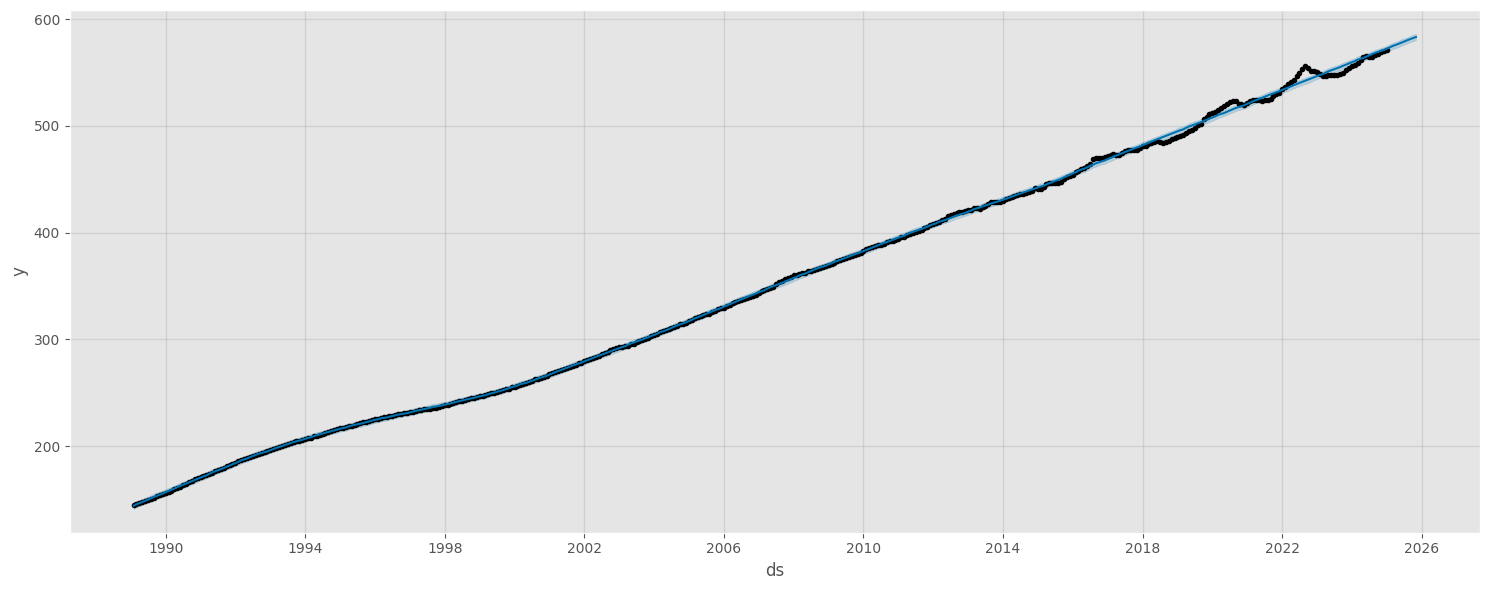

In [15]:
figure_prophet = kkopp.plot(result, figsize=(15, 6))

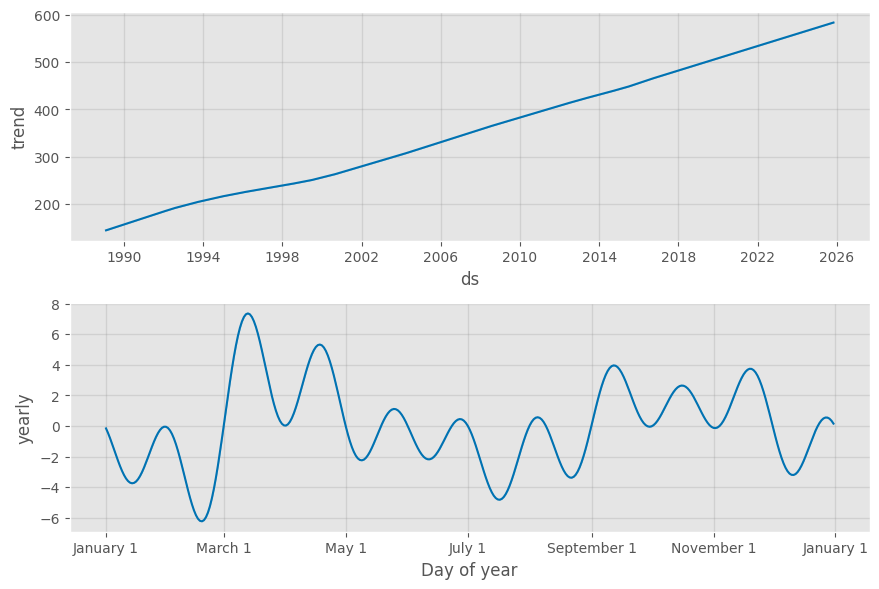

In [16]:
figure_porphet_2  = kkopp.plot_components(result)

## Cross-Validation and Performance Metrics with Prophet  

### Overview  
In this step, we perform **cross-validation** to evaluate the accuracy of our **Prophet** model. Cross-validation helps assess how well the model generalizes to unseen data by splitting the historical dataset into training and testing periods.  

### Steps Involved  

#### 1️⃣ Cross-Validation (`cross_validation` function)  
- **`initial`**: The first **600 days** (30 × 20) are used for training.  
- **`period`**: Every **150 days** (30 × 5), a new validation split is created.  
- **`horizon`**: The model is tested on the next **360 days** (30 × 12). 

In [17]:
from prophet.diagnostics import cross_validation,performance_metrics

gg_result = cross_validation(model=kkopp, initial=pd.to_timedelta(30*20, unit="D"), period=pd.to_timedelta(30*5, unit="D"), horizon=pd.to_timedelta(30*12, unit="D") )


df_p = performance_metrics(gg_result)

  0%|          | 0/82 [00:00<?, ?it/s]

05:16:48 - cmdstanpy - INFO - Chain [1] start processing
05:16:48 - cmdstanpy - INFO - Chain [1] done processing
05:16:48 - cmdstanpy - INFO - Chain [1] start processing
05:17:04 - cmdstanpy - INFO - Chain [1] done processing
05:17:04 - cmdstanpy - INFO - Chain [1] start processing
05:17:23 - cmdstanpy - INFO - Chain [1] done processing
05:17:23 - cmdstanpy - INFO - Chain [1] start processing
05:17:45 - cmdstanpy - INFO - Chain [1] done processing
05:17:45 - cmdstanpy - INFO - Chain [1] start processing
05:17:51 - cmdstanpy - INFO - Chain [1] done processing
05:17:52 - cmdstanpy - INFO - Chain [1] start processing
05:17:52 - cmdstanpy - INFO - Chain [1] done processing
05:17:52 - cmdstanpy - INFO - Chain [1] start processing
05:17:52 - cmdstanpy - INFO - Chain [1] done processing
05:17:53 - cmdstanpy - INFO - Chain [1] start processing
05:17:53 - cmdstanpy - INFO - Chain [1] done processing
05:17:53 - cmdstanpy - INFO - Chain [1] start processing
05:17:53 - cmdstanpy - INFO - Chain [1]

In [18]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,148.407537,12.182263,2.915840,0.011327,0.003002,0.015114,0.156250
1,38 days,148.053573,12.167727,2.896546,0.011293,0.003002,0.015079,0.161458
2,39 days,147.224576,12.133613,2.806431,0.011120,0.002996,0.014906,0.177083
3,40 days,147.202482,12.132703,2.794047,0.011084,0.002985,0.014869,0.187500
4,41 days,147.162775,12.131067,2.779474,0.011054,0.002996,0.014840,0.197917
...,...,...,...,...,...,...,...,...
319,356 days,29.126915,5.396936,2.981680,0.008963,0.007012,0.009256,0.399306
320,357 days,29.604967,5.441045,3.070169,0.009118,0.007139,0.009410,0.385417
321,358 days,28.694766,5.356750,3.038647,0.009107,0.007139,0.009400,0.354167
322,359 days,28.815259,5.367985,3.062141,0.009213,0.007139,0.009507,0.348958


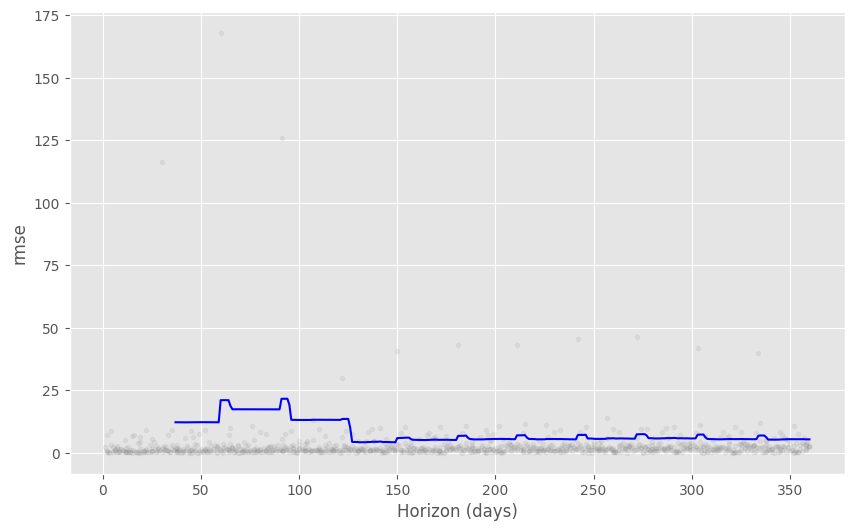

In [19]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(gg_result, metric='rmse')
